## Import packages

Note `keras.preprocessing.image`

In [0]:
import numpy as np
from keras.preprocessing import image
import matplotlib.pyplot as plt
import imageio

## Generators

The following examples are adapted from "Fluent Python" by Luciano Ramalho (2015).

#### Formal definition:

 * A generator is a function that uses the key word `yield`

#### First example (unrealistic):

In [68]:
def gen_123():
  yield '1'
  yield '2'
  yield '3'

g = gen_123()

print("type of gen_123 is " + str(type(gen_123)))
print("type of g is " + str(type(g)))
print(next(g))
print(next(g))
print(next(g))

type of gen_123 is <class 'function'>
type of g is <class 'generator'>
1
2
3


In [69]:
print(next(g))

StopIteration: ignored

What just happened:

 * `gen_123` is a function
 * When called, `gen_123` creates a "generator object" (`g`)
 * Calling `next(g)` basically does what you'd think calling the original `gen_123` function would do.
 * `yield` is similar to return: as soon as the yield statement is called, the function stops running and returns the specified quantity
 * But when the generator is called again, it picks up where it left off.
 * If it runs out of stuff to yield, an error is thrown.

#### Second Example (more like how we'll use generators):

In [70]:
def gen_ints():
  i = 0
  while True: # generator will never stop generating another integer!
    i = i + 1
    yield i

g = gen_ints()

print(str(next(g)))
print(str(next(g)))

1
2


In [72]:
for i in range(10):
  print(str(next(g)))

3
4
5
6
7
8
9
10
11
12


## Benedict!

(2, 1450, 1450, 3)


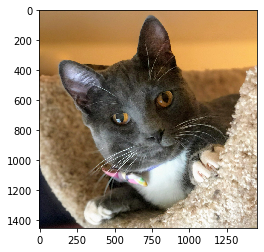

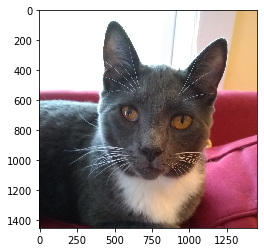

In [0]:
benedict_path = "http://www.evanlray.com/stat344ne_s2020/homework/hw1/benedict.jpg"
benedict_path2 = "https://raw.githubusercontent.com/mhc-stat344ne-s2020/20200226_examples/master/benedict.jpg"
benedict = np.concatenate(
    (np.array(imageio.imread(benedict_path))[np.newaxis, 50:1500, 0:1450, :],
     np.array(imageio.imread(benedict_path2))[np.newaxis, 50:1500, 0:1450, :]),
    axis = 0)
print(benedict.shape)
plt.imshow(benedict[0, ...])
plt.show()
plt.imshow(benedict[1, ...])

`benedict` is in the shape expected by Keras (observations in first axis):
 * 2 observations
 * 1450 rows, 1450 columns, 3 channels (RGB)

## Create Image Data Generator

 * It's a generator.
 * Every time you call it, you get a new (batch of) images. 
 * It never runs out (it goes back to the beginning of the data set, shuffles the data, and starts over).

In [0]:
# create data generator
train_X = benedict
train_y = np.array([1, 1])
data_gen_setup = image.ImageDataGenerator()
gen = data_gen_setup.flow(train_X, train_y, batch_size=1)

(1, 1450, 1450, 3)
[1]


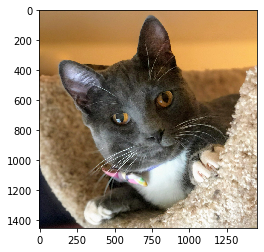

In [74]:
batch = next(gen)
X = batch[0].astype(int)
y = batch[1]
print(X.shape)
plt.imshow(X[0, :, :, :])
print(y)

(1, 1450, 1450, 3)
[1]


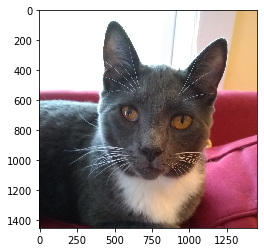

In [75]:
batch = next(gen)
X = batch[0].astype(int)
y = batch[1]
print(X.shape)
plt.imshow(X[0, :, :, :])
print(y)

We could have set it up to ask for batches of size 2:

In [76]:
gen2 = data_gen_setup.flow(train_X, train_y, batch_size=2)
batch = next(gen2)
X = batch[0].astype(int)
print(X.shape)

(2, 1450, 1450, 3)


You could also "flow" the files from a directory containing the image files.  You'll see this in today's lab.

#Data Augmentation

 * You're working with image data (occasionally applied in other settings, but relatively rare)
 * Your data set is small and/or you're overfitting
 * Take your original training set images (not validation or test set), and randomly modify them a little.

Examples below adapted from https://machinelearningmastery.com/how-to-configure-image-data-augmentation-when-training-deep-learning-neural-networks/

## Rotation

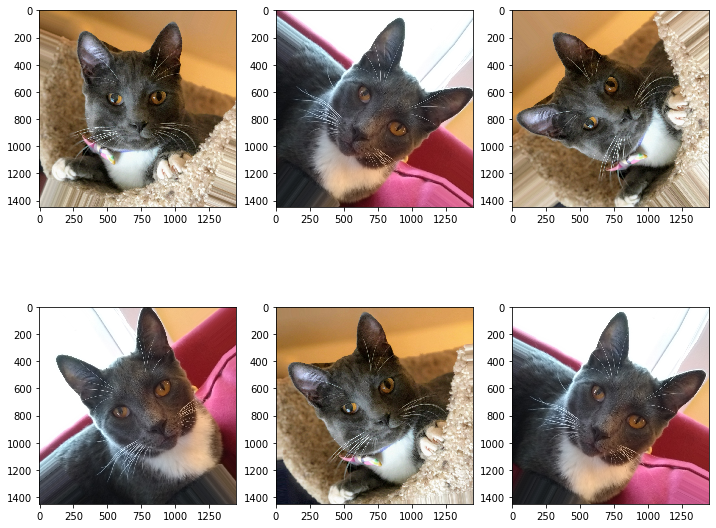

In [77]:
data_gen_setup = image.ImageDataGenerator(
      rotation_range=40,
      fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])

### Width Shift

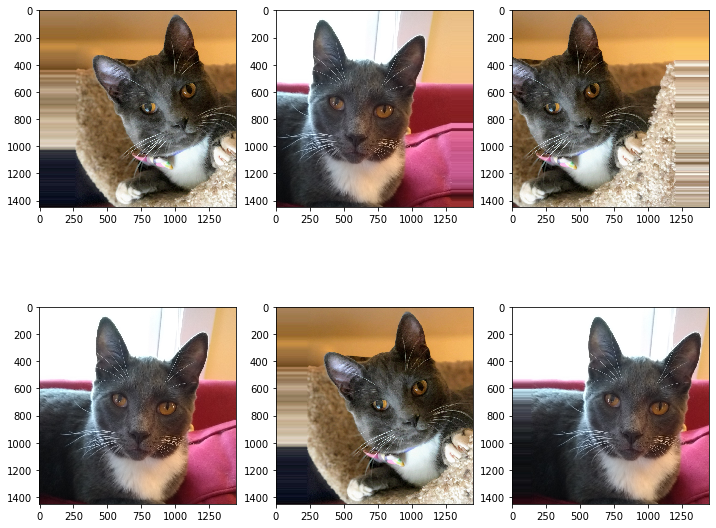

In [79]:
data_gen_setup = image.ImageDataGenerator(
    width_shift_range=0.2,
    fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])

###Height Shift

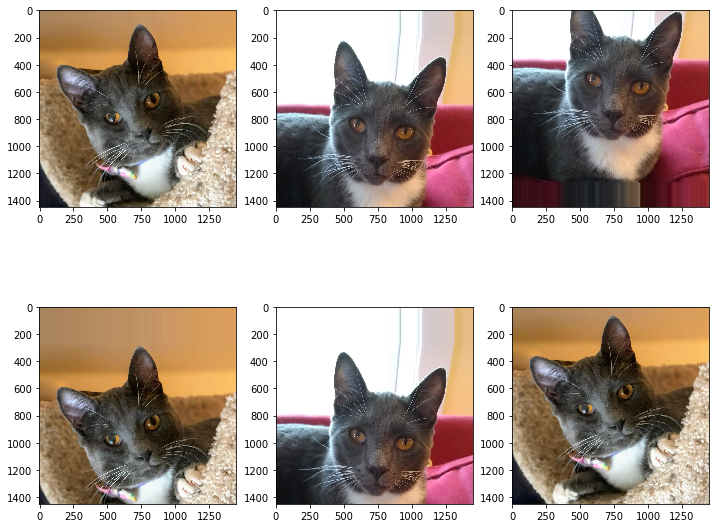

In [81]:
data_gen_setup = image.ImageDataGenerator(
    height_shift_range=0.2,
    fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])

###Shear

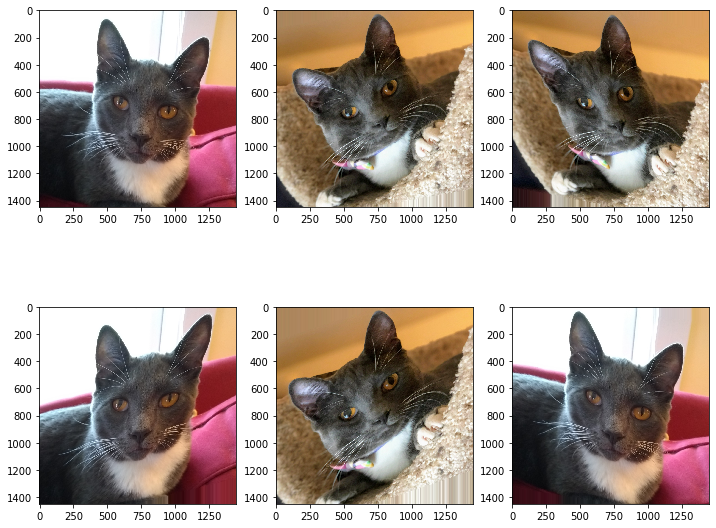

In [82]:
data_gen_setup = image.ImageDataGenerator(
    shear_range=20,
    fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])

###Horizontal Flip

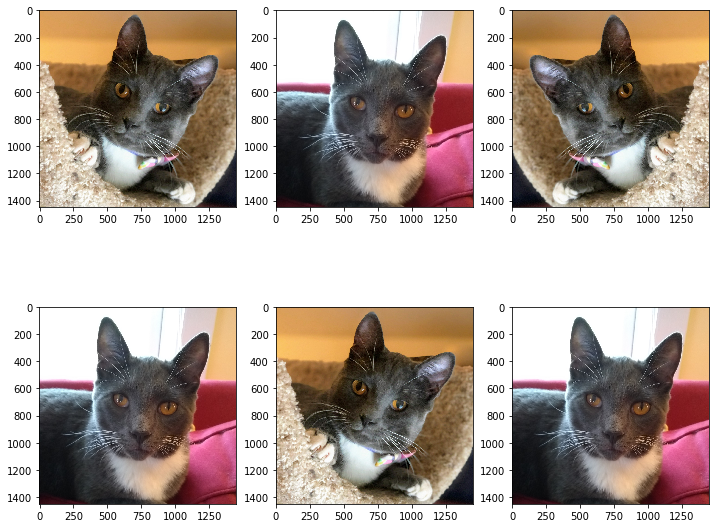

In [83]:
data_gen_setup = image.ImageDataGenerator(
    horizontal_flip=True,
    fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])

### All at Once

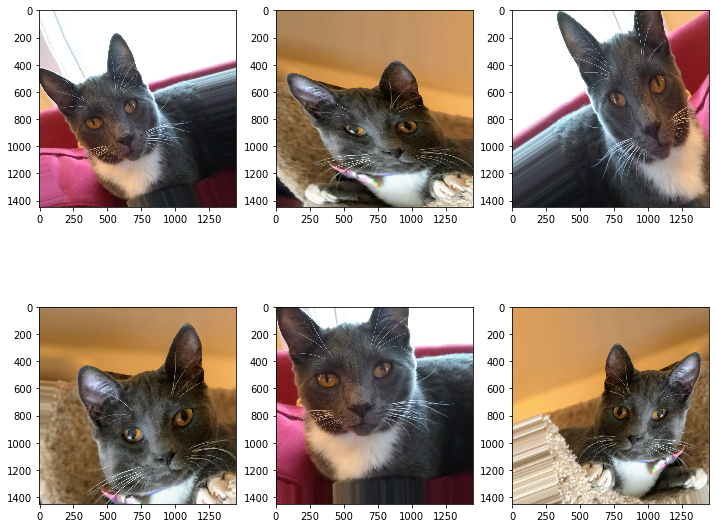

In [84]:
data_gen_setup = image.ImageDataGenerator(
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=20,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

train_generator = data_gen_setup.flow(train_X, train_y, batch_size=1)

fig, axs = plt.subplots(2, 3, figsize = (12, 10))

for i in range(2):
  for j in range(3):
    batch = next(train_generator)
    X = batch[0].astype(int)
    axs[i, j].imshow(X[0, :, :, :])